<a href="https://colab.research.google.com/github/Abhishek09032000/Abhi/blob/master/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Machine Learning Project**

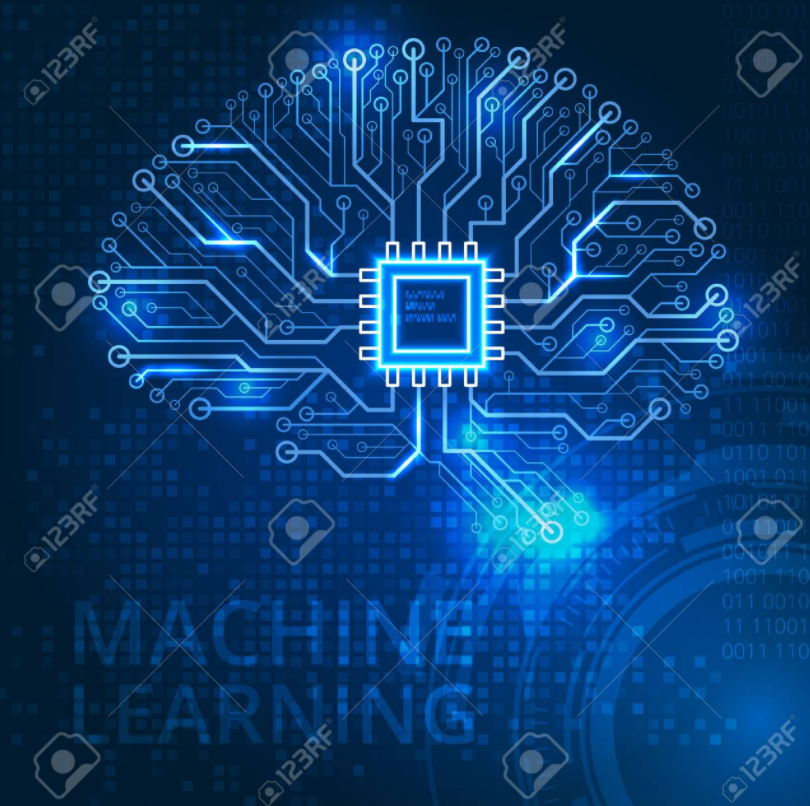

# **MARKETING CAMPAIGN FOR BANKING PRODUCTS**

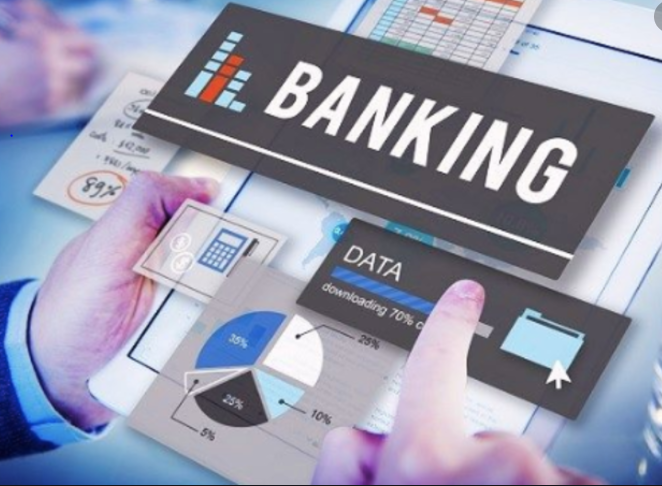

# **1.Uploading the Dataset**

Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc

## **1.1.Import Libraries**

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

## **1.2.Import the Dataset**

In [209]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online",
                                   "CreditCard"]

In [210]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [211]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [212]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable

Securities Account - Does the customer have a securities account with the bank?

CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

Online - Does the customer use internet banking facilities?

Credit Card - Does the customer use a credit card issued by UniversalBank?
Interval variables are as below:

Age - Age of the customer

Experience - Years of experience

Income - Annual income in dollars

CCAvg - Average credit card spending

Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

Family - Family size of the customer

Education - education level of the customer:1:Undergraduate;2:Graduate;3:Advanced/Professional

The nominal variable is :

ID

Zip Code

In [213]:
data.shape

(5000, 14)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [215]:
data.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [216]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We now know that:

1) Our data has 5000 row and 14 attributes.

2) Our data is clean i.e. no null values present in the data.

3) Our data is numeric in nature.

4) Experience can not be negative but our table is showing it. So we have to clean this attribute.

Lets check that wheather age and experience are correlated.

In [217]:
data['Experience'].corr(data['Age'])

0.9942148569683321

In [218]:
corr = data.corr(method = 'pearson')
corr

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


We can see that these columns are highly correlated so we can use only one column. Lets take the age column only.

# **2.Cleaning Data**

**Check if you need to clean the data for any of the variables**

The id of a person will not help our model to reach a conclusion. So we will drop id column. Also, the experience ir highlr correlated to age so we will also drop experience column.

In [219]:
data=data.drop('ID',1)

In [220]:
data=data.drop('Experience',1)

# **3.EXPLORATORY DATA ANALYSIS**

Study the data distribution in each attribute and target variable, share your
findings.

## **3.1. Number of unique in each column?**

In [221]:
data.nunique()

Age                   45
Income               162
ZIPCode              467
Family                 4
CCAvg                108
Education              3
Mortgage             347
PersonalLoan           2
SecuritiesAccount      2
CDAccount              2
Online                 2
CreditCard             2
dtype: int64

We can conclude that various columns have categorical values like Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard. Lets find out the number of values in each of these columns.

## **3.2.Number of people with zero mortgage?**

In [222]:
## Number of People with 0 mortgage
## There are 3462 people with 0 mortgage out of 500
(data.Mortgage == 0).sum()

3462

## **3.3.Number of people with zero credit card spending per month?**

In [223]:
## Number of people with 0 credit card spending per month
## There are 106 people wiht 0 average credit card spending per month
(data.CCAvg == 0).sum()

106

## **3.4.Value counts of all categorical columns.**

In [224]:
l = ['Family', 'Education', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard']
for col in l:
    print(col)
    print(data[col].value_counts())
    print("--"*20)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
----------------------------------------
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
----------------------------------------
PersonalLoan
0    4520
1     480
Name: PersonalLoan, dtype: int64
----------------------------------------
SecuritiesAccount
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
----------------------------------------
CDAccount
0    4698
1     302
Name: CDAccount, dtype: int64
----------------------------------------
Online
1    2984
0    2016
Name: Online, dtype: int64
----------------------------------------
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
----------------------------------------


Lets try to plot these data and get more clear insights.
Lets see about the families first.

In [225]:
data.describe()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## **3.5.Univariate Analysis**

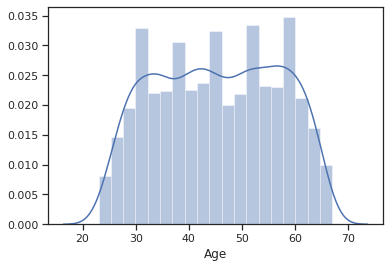

In [226]:
## Univariate Analysis
## Age seems to have symmetric Distribution 
sns.distplot(data.Age);

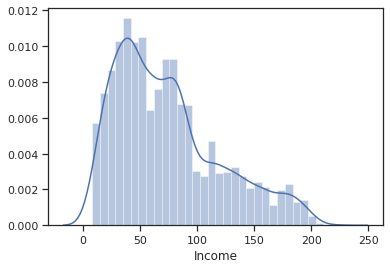

In [227]:
##Income is right skewed distribution
sns.distplot(data.Income);

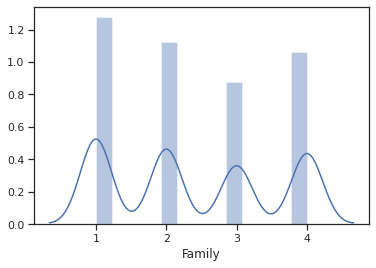

In [228]:
sns.distplot(data.Family);

We can conclude about family size of the customers from here. Most of then customers are single.

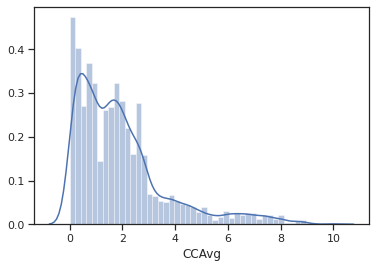

In [229]:
sns.distplot(data.CCAvg);

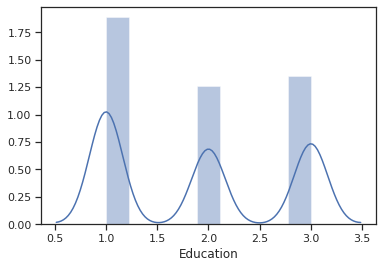

In [230]:
sns.distplot(data.Education);

It seems 2096 of the customers are undergraduate. After this, professionals(1501) are more than graduate(1403).

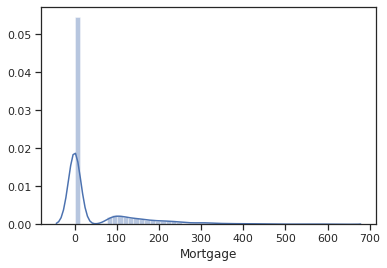

In [231]:
## Mortgage columns seems highly skewed
sns.distplot(data.Mortgage);

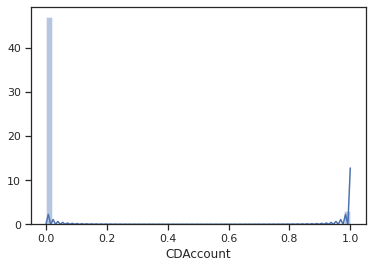

In [232]:
sns.distplot(data.CDAccount);

It also seems pretty low. Only 302 people from 5000 peope have this account. it is only 6.04% of the total customers.

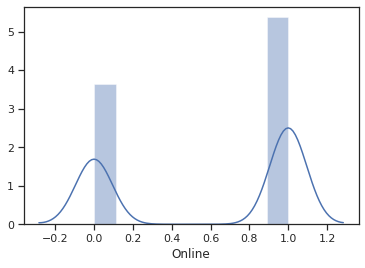

In [233]:
sns.distplot(data.Online);

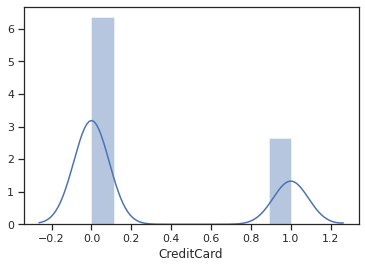

In [234]:
sns.distplot(data.CreditCard);

It seems many people are using online facilities provided by bank but only few are using credit cards. Around 59% people are using online facilities provided by the bank and 29% peole are using the credit card facilties.

In [235]:
data=data.drop('ZIPCode',axis = 1)

In [236]:
data

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


## **3.6.Bivariate Analysis**

**Influence of Income and Education on Personal Loan**

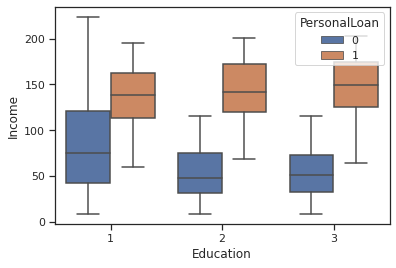

In [237]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

**Observation** : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

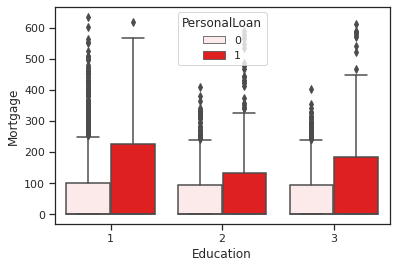

In [238]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data,color='red')

Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

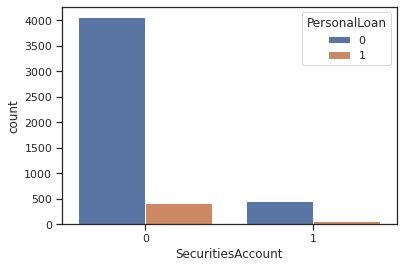

In [239]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")

**Observation** : Majority of customers who does not have loan have securities account



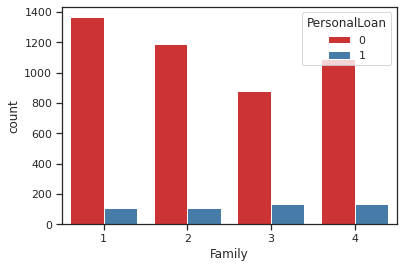

In [240]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set1')

**Observation**: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

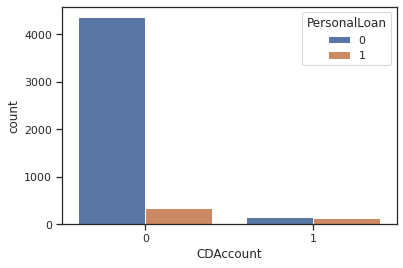

In [241]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')

Observation: Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well


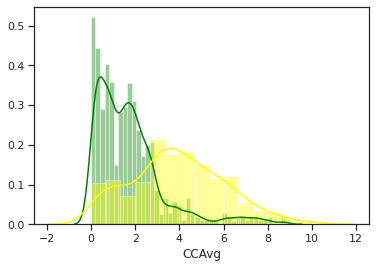

In [242]:
sns.distplot( data[data.PersonalLoan == 0]['CCAvg'], color = 'green')
sns.distplot( data[data.PersonalLoan == 1]['CCAvg'], color = 'yellow')

In [243]:
print('Credit card spending of Non-Loan customers: ',data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


**Observation**: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

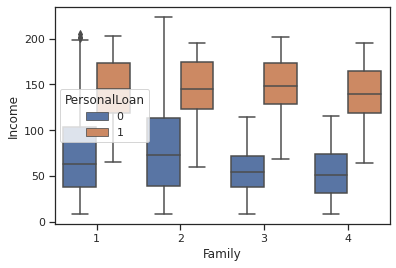

In [244]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

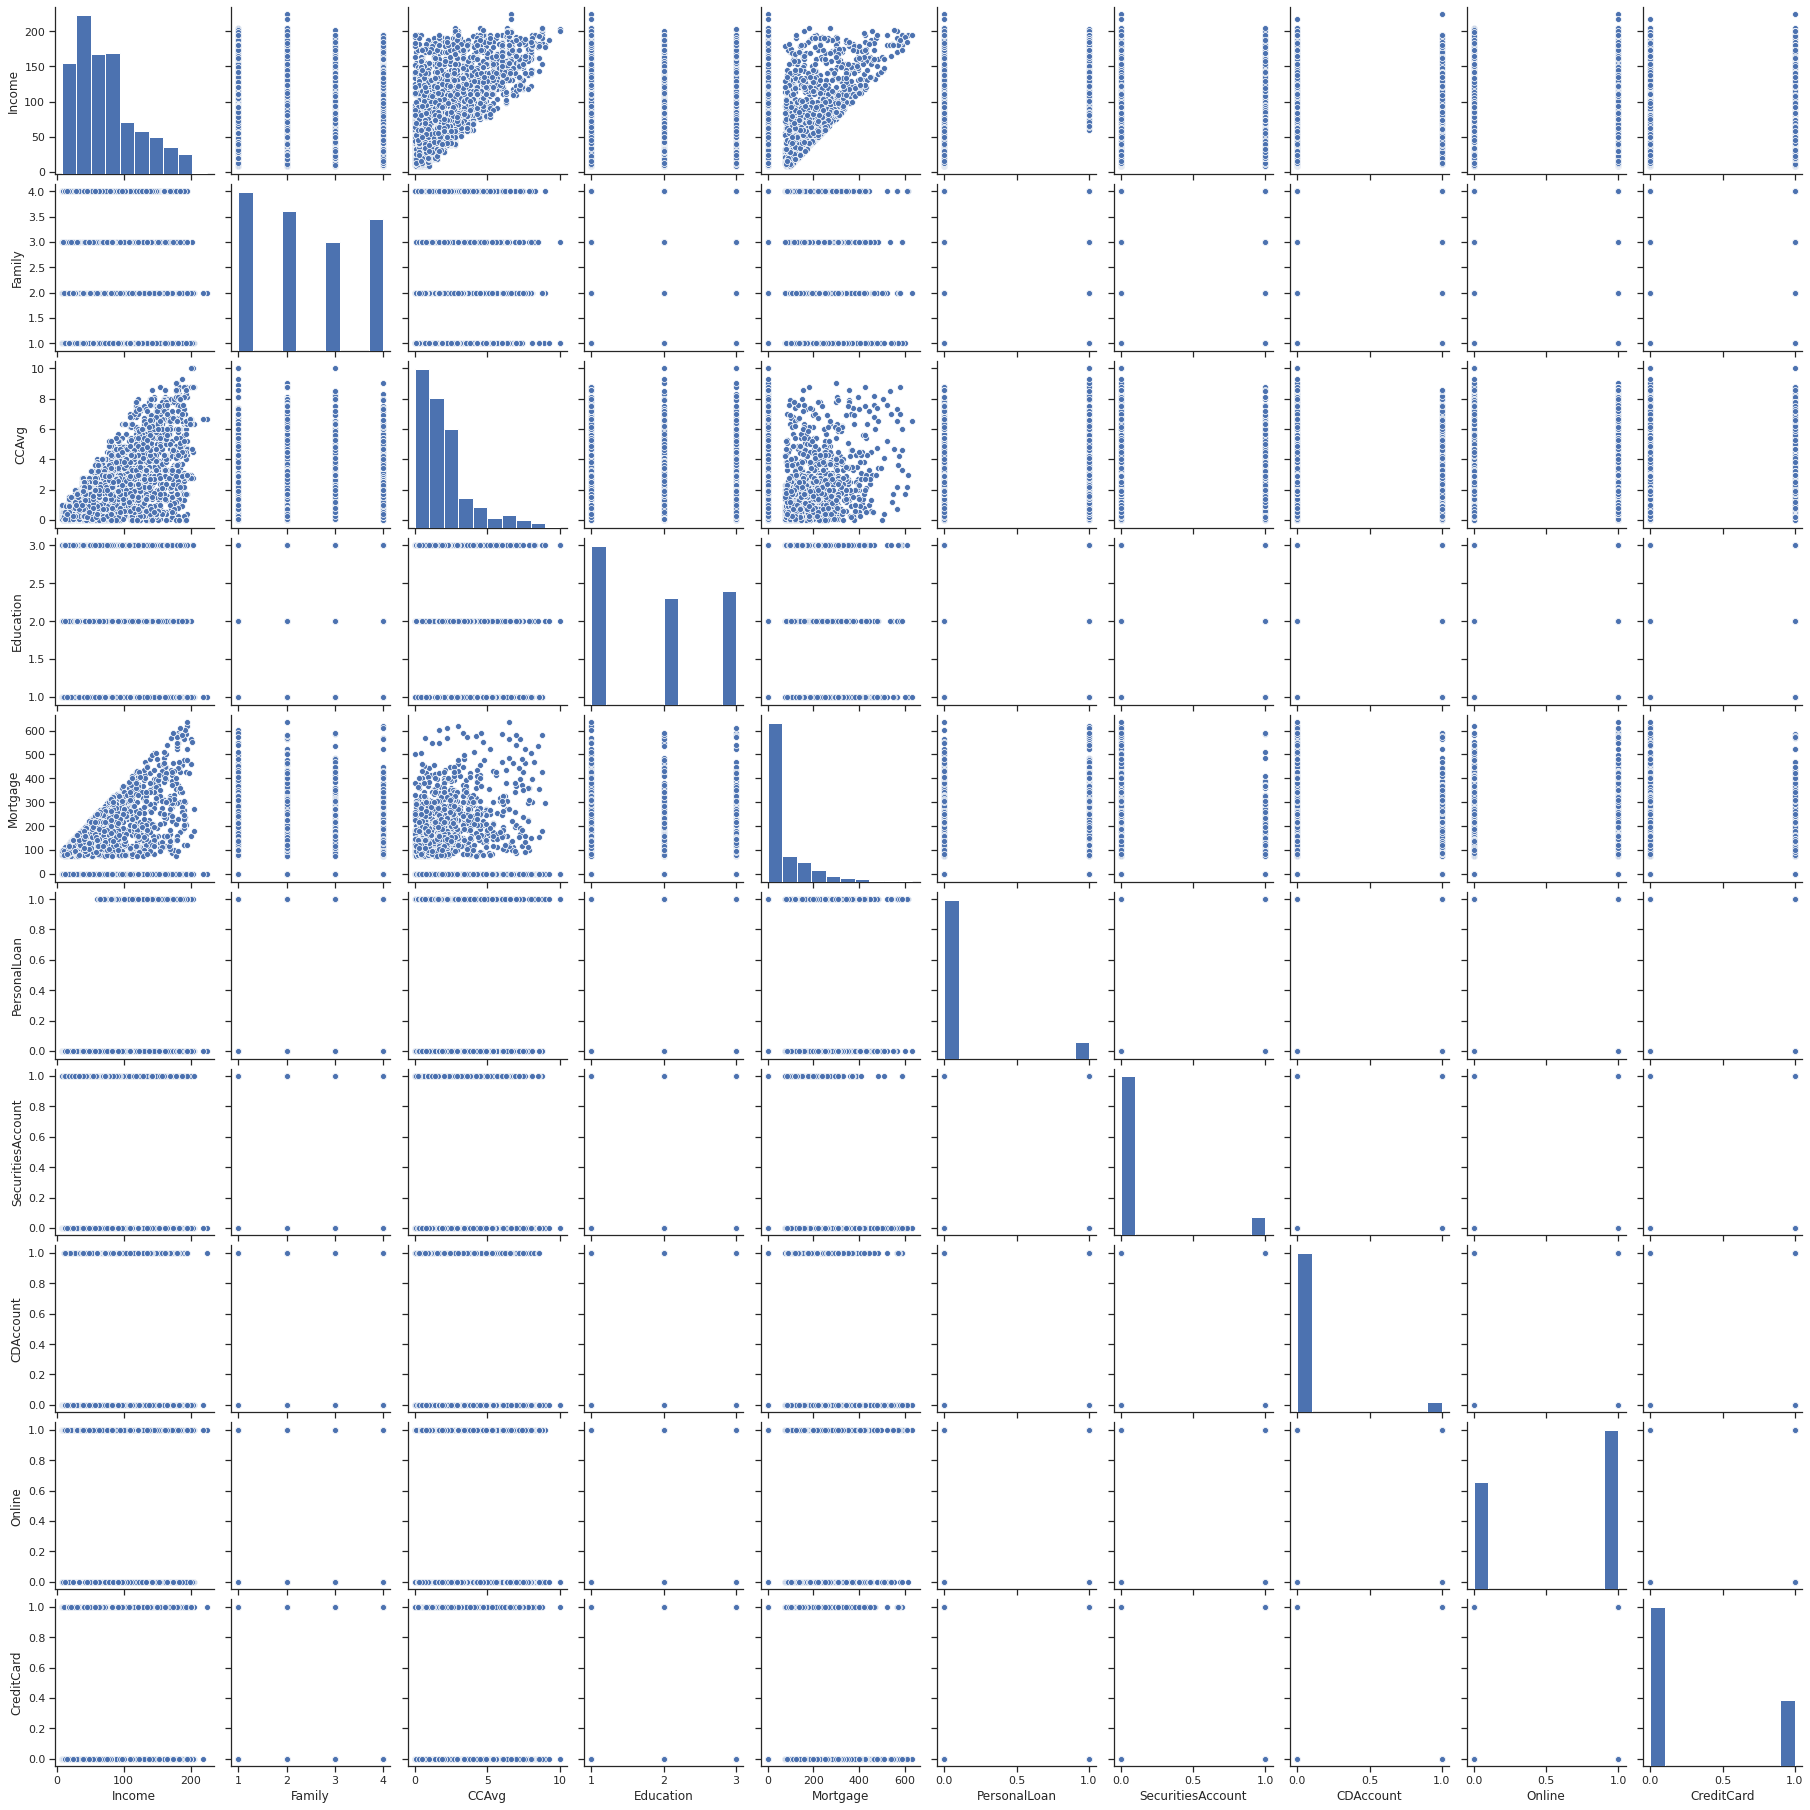

In [245]:
sns.pairplot(data.iloc[:,1:])

Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

The variables family and education are ordinal variables. The distribution of families is evenly distributes

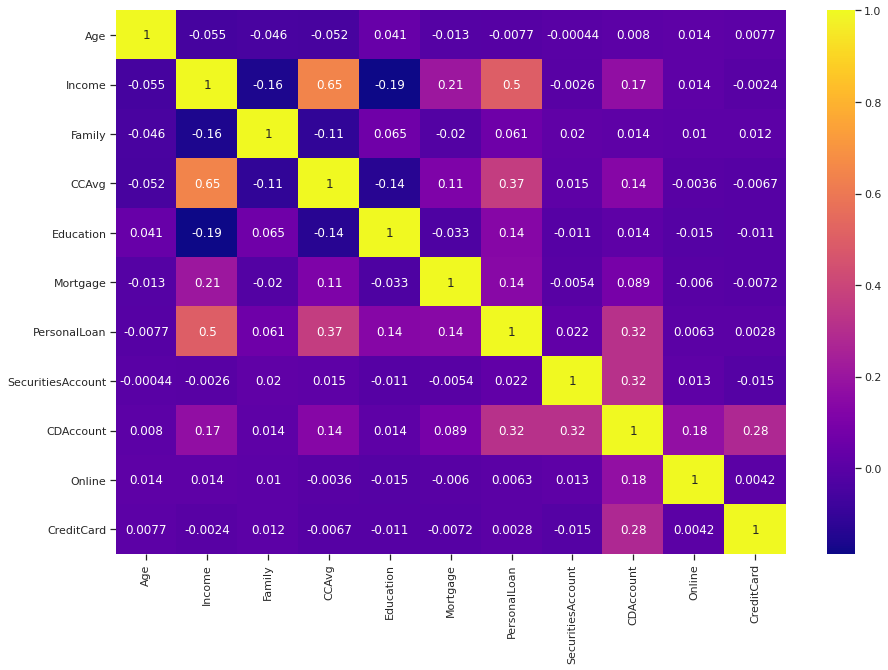

In [246]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='plasma', annot=True);

# **4.Apply necessary transformations for the feature variables**

In [247]:
x = data[['Age','Income','Family','CCAvg','Online','CreditCard','Education','Mortgage', 'SecuritiesAccount', 'CDAccount']]
y = data['PersonalLoan'].values

## **4.1.FEATURE SCALING AND TRANSFORMATION**

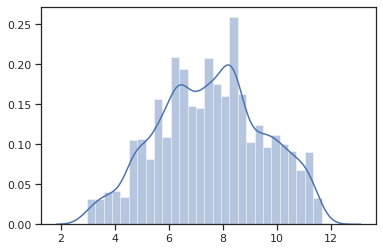

In [248]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Income'].values.reshape(-1,1)))

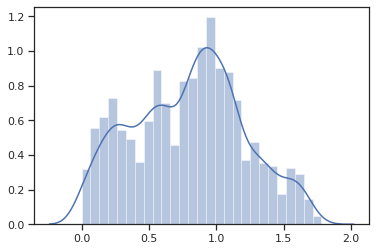

In [249]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(x['CCAvg'].values.reshape(-1,1)))

In [250]:
x["Mortgage_Int"] = pd.cut(x["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
x.drop("Mortgage",axis=1, inplace=True)

In [251]:
x.head()

,Age,Income,Family,CCAvg,Online,CreditCard,Education,SecuritiesAccount,CDAccount,Mortgage_Int
0,25,49,4,1.6,0,0,1,1,0,0
1,45,34,3,1.5,0,0,1,1,0,0
2,39,11,1,1.0,0,0,1,0,0,0
3,35,100,1,2.7,0,0,2,0,0,0
4,35,45,4,1.0,0,1,2,0,0,0


# **5.Split the data into Training AND Testing Set**

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0,stratify = y)
scx.fit_transform(x_train)
scx.transform(x_test)
#scy.fit_transform(y_train.reshape(-1,1))
#scy.transform(y_test.reshape(-1,1))

array([[-0.97265109,  2.31851937, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [ 0.85873161,  0.16296952, -0.34389746, ...,  2.97177736,
        -0.24878345, -0.47490853],
       [ 0.24827071,  1.18631137, -1.21736706, ...,  2.97177736,
        -0.24878345, -0.47490853],
       ...,
       [ 0.68431421, -0.92569202, -0.34389746, ..., -0.33649896,
        -0.24878345,  0.68340496],
       [-0.97265109, -0.53377386, -1.21736706, ..., -0.33649896,
        -0.24878345, -0.47490853],
       [-0.01335539, -0.33781479,  0.52957214, ...,  2.97177736,
        -0.24878345, -0.47490853]])

# **6. Use the Logistic Regression model to predict the likelihood of a customer buying personal Loans.**

# **7.Print all the metrics related for evaluating the model performance**

In [253]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [254]:
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [255]:
y_pred = model.predict(x_test)

In [256]:
from sklearn import metrics

In [257]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))

MAE: 0.05533333333333333
R2 score: 0.36240167158308745


In [258]:
print(metrics.accuracy_score(y_test,y_pred))

0.9446666666666667


In [259]:
print(metrics.accuracy_score(y_train,model.predict(x_train)))

0.9494285714285714


In [260]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1332   24]
 [  59   85]]


In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.78      0.59      0.67       144

    accuracy                           0.94      1500
   macro avg       0.87      0.79      0.82      1500
weighted avg       0.94      0.94      0.94      1500



# **8. Build various other classification algorithms and compare their performance**

## **8.1.DECISION TREE**

In [262]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [263]:
y_pred = clf.predict(x_test)

In [264]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.019333333333333334
R2 score: 0.777224680432645
Accuracy score for test data 0.9806666666666667


In [265]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [266]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1343   13]
 [  16  128]]


In [267]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.91      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## **8.2.RANDOM FOREST**

In [268]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [269]:
y_pred = clf.predict(x_test)

In [270]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.012
R2 score: 0.8617256637168141
Accuracy score for test data 0.988


In [271]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.9494285714285714


In [272]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1353    3]
 [  15  129]]


In [273]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.90      0.93       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



## **8.3.NAIVE BAYES**

In [274]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [275]:
y_pred = model.predict(x_test)

In [276]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.11266666666666666
R2 score: -0.2982423795476894
Accuracy score for test data 0.8873333333333333


In [277]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8805714285714286


In [278]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1243  113]
 [  56   88]]


In [279]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1356
           1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500



## **8.4.KNN algorithm**

In [280]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [281]:
y_pred = neigh.predict(x_test)

In [282]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("R2 score:",metrics.r2_score(y_test,y_pred))
print("Accuracy score for test data",metrics.accuracy_score(y_test,y_pred))

MAE: 0.07266666666666667
R2 score: 0.16267207472959677
Accuracy score for test data 0.9273333333333333


In [283]:
print("Accuracy score for train data",metrics.accuracy_score(y_train,model.predict(x_train)))

Accuracy score for train data 0.8805714285714286


In [284]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1324   32]
 [  77   67]]


In [285]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1356
           1       0.68      0.47      0.55       144

    accuracy                           0.93      1500
   macro avg       0.81      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



# **9. Give a business understanding of your model**

## **Conclusion:**

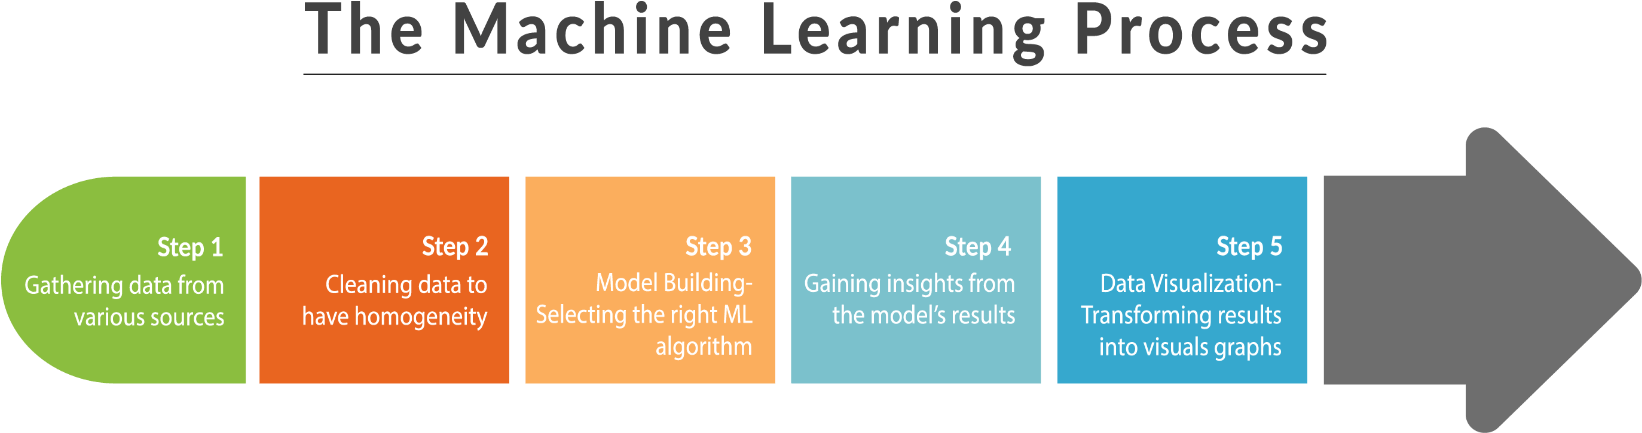

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Five classification algorithms were used in this study.

**Logistic Regression**

ACCURACY SCORE: 94.94%

CONFUSION MATRIX: [[1332   24][  59   85]]

CLASSIFICATION REPORT: precision    recall  f1-score   support

                0       0.96      0.98      0.97      1356
                1       0.78      0.59      0.67       144

    accuracy                           0.94      1500
  
    macro avg            0.87      0.79      0.82      1500
 
    weighted avg          0.94      0.94      0.94      1500


So we can see that accuracy score for ur test data is 94.94%.
Now let us try and check the accuracy with the other models as well.

**Decision Tree**

Accuracy Score: 97.86%

Confusion Matrix:[[1340   16][  16  128]]

Classification Report: precision     recall   f1-score    support
          
                  0       0.99      0.99      0.99      1356
                  1       0.89      0.89      0.89       144

    accuracy                           0.98      1500
    macro avg       0.94      0.94      0.94      1500
    weighted avg    0.98      0.98      0.98      1500


It is working very much better than Logistic algorithm. It is showing 97.86% accuracy score.

**Random Forest**

Accuracy Score:98.73

Confusion Matrix:[[1352    4][  15  129]]

Classification Report:precision     recall   f1-score    support
 
               0       0.99      1.00      0.99      1356
               1       0.97      0.90      0.93       144

    accuracy                           0.99      1500
    macro avg       0.98      0.95      0.96      1500
    weighted avg    0.99      0.99      0.99      1500


 It is clearly showing that the model of random forest is working very good. The accuracy score is 98.73% for test data which is highest in all the algorithm we have used till now.

**Naive Bayes**

Accuracy Score:88.73%

Confusion Matrix:[[1243  113][  56   88]]

Classification Report:precision recall f1-score support

             0       0.96      0.92      0.94      1356
             1       0.44      0.61      0.51       144

    accuracy                           0.89      1500
    macro avg       0.70      0.76      0.72      1500
    weighted avg    0.91      0.89      0.90      1500


The accuracy score for Naive Bayes algorithm in this case is not very good. From all the models it is least till now. It is 88.73% which is less than other algos.

**KNN Algorithm**

Accuracy Score:92.73%

Confusion Matrix:[[1324   32][  77   67]]

Classification Report:precision recall f1-score support

              0       0.95      0.98      0.96      1356
              1       0.68      0.47      0.55       144

    accuracy                            0.93      1500
    macro avg       0.81      0.72      0.76      1500
    weighted avg    0.92      0.93      0.92      1500


We can find out that it is working better than Naive Bayes algorithm but not with any other. Its accuracy score is 92.73%.